In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Hypothyroid.csv')

In [3]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


# Exploratory Data Analysis

In [4]:
df.replace({'f': -1, 't': 1}, inplace=True)

In [5]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,-1,-1,-1,-1,-1,-1,-1,-1,...,1,125,1,1.14,1,109,-1,?,SVHC,P
1,23,F,-1,-1,-1,-1,-1,-1,-1,-1,...,1,102,-1,?,-1,?,-1,?,other,P
2,46,M,-1,-1,-1,-1,-1,-1,-1,-1,...,1,109,1,0.91,1,120,-1,?,other,P
3,70,F,1,-1,-1,-1,-1,-1,-1,-1,...,1,175,-1,?,-1,?,-1,?,other,P
4,70,F,-1,-1,-1,-1,-1,-1,-1,-1,...,1,61,1,0.87,1,70,-1,?,SVI,P


In [6]:
df.replace({'?':np.NaN},inplace=True)

In [7]:
df.isna().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [8]:
df['sex'].value_counts()

F    2480
M    1142
Name: sex, dtype: int64

In [9]:
df = df.drop(['TBG','TBG measured'],axis=1)

<AxesSubplot:>

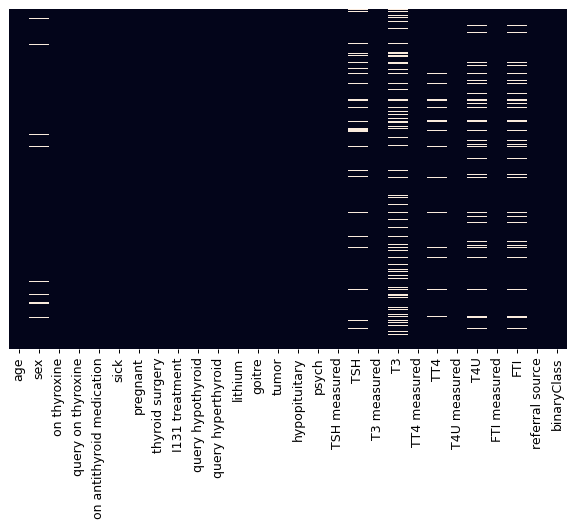

In [10]:
plt.figure(figsize=(8,5),dpi=90)
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

In [11]:
df.isna().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
referral source                0
binaryClass                    0
dtype: int64

In [12]:
df = df[df['sex'].notna()]

In [13]:
df = df.replace({'F':-1,'M':1,'P':1,'N':-1})

<AxesSubplot:>

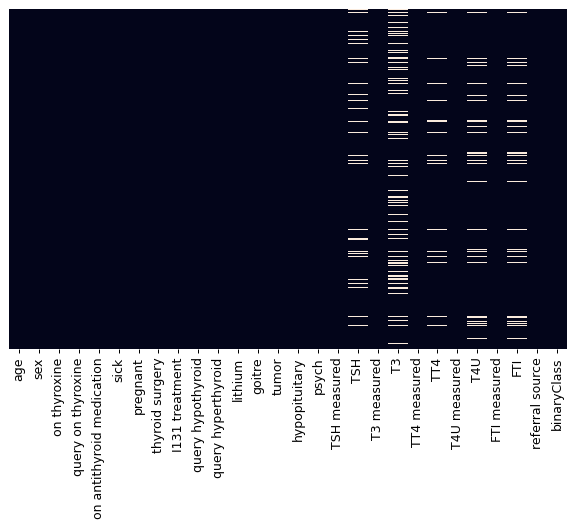

In [14]:
plt.figure(figsize=(8,5),dpi=90)
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

In [15]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,binaryClass
0,41,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,2.5,1,125,1,1.14,1,109,SVHC,1
1,23,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,2,1,102,-1,NaN,-1,NaN,other,1
2,46,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,NaN,1,109,1,0.91,1,120,other,1
3,70,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,1.9,1,175,-1,NaN,-1,NaN,other,1
4,70,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1.2,1,61,1,0.87,1,70,SVI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,other,1
3768,68,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,2.1,1,124,1,1.08,1,114,SVI,1
3769,74,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1.8,1,112,1,1.07,1,105,other,1
3770,72,1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,2,1,82,1,0.94,1,87,SVI,1


In [16]:
df = df.dropna(subset=['age'],axis=0)

In [17]:
df.loc[:,['age','TT4','FTI']] = df.loc[:,['age','TT4','FTI']].astype(float)

C:\Users\disha\anaconda3\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [18]:
df.loc[:,['TSH','T3','T4U']] = df.loc[:,['TSH','T3','T4U']].astype(float)

In [19]:
df.isnull().sum()

age                            0
sex                            0
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          352
T3 measured                    0
T3                           745
TT4 measured                   0
TT4                          217
T4U measured                   0
T4U                          367
FTI measured                   0
FTI                          365
referral source                0
binaryClass                    0
dtype: int64

<AxesSubplot:>

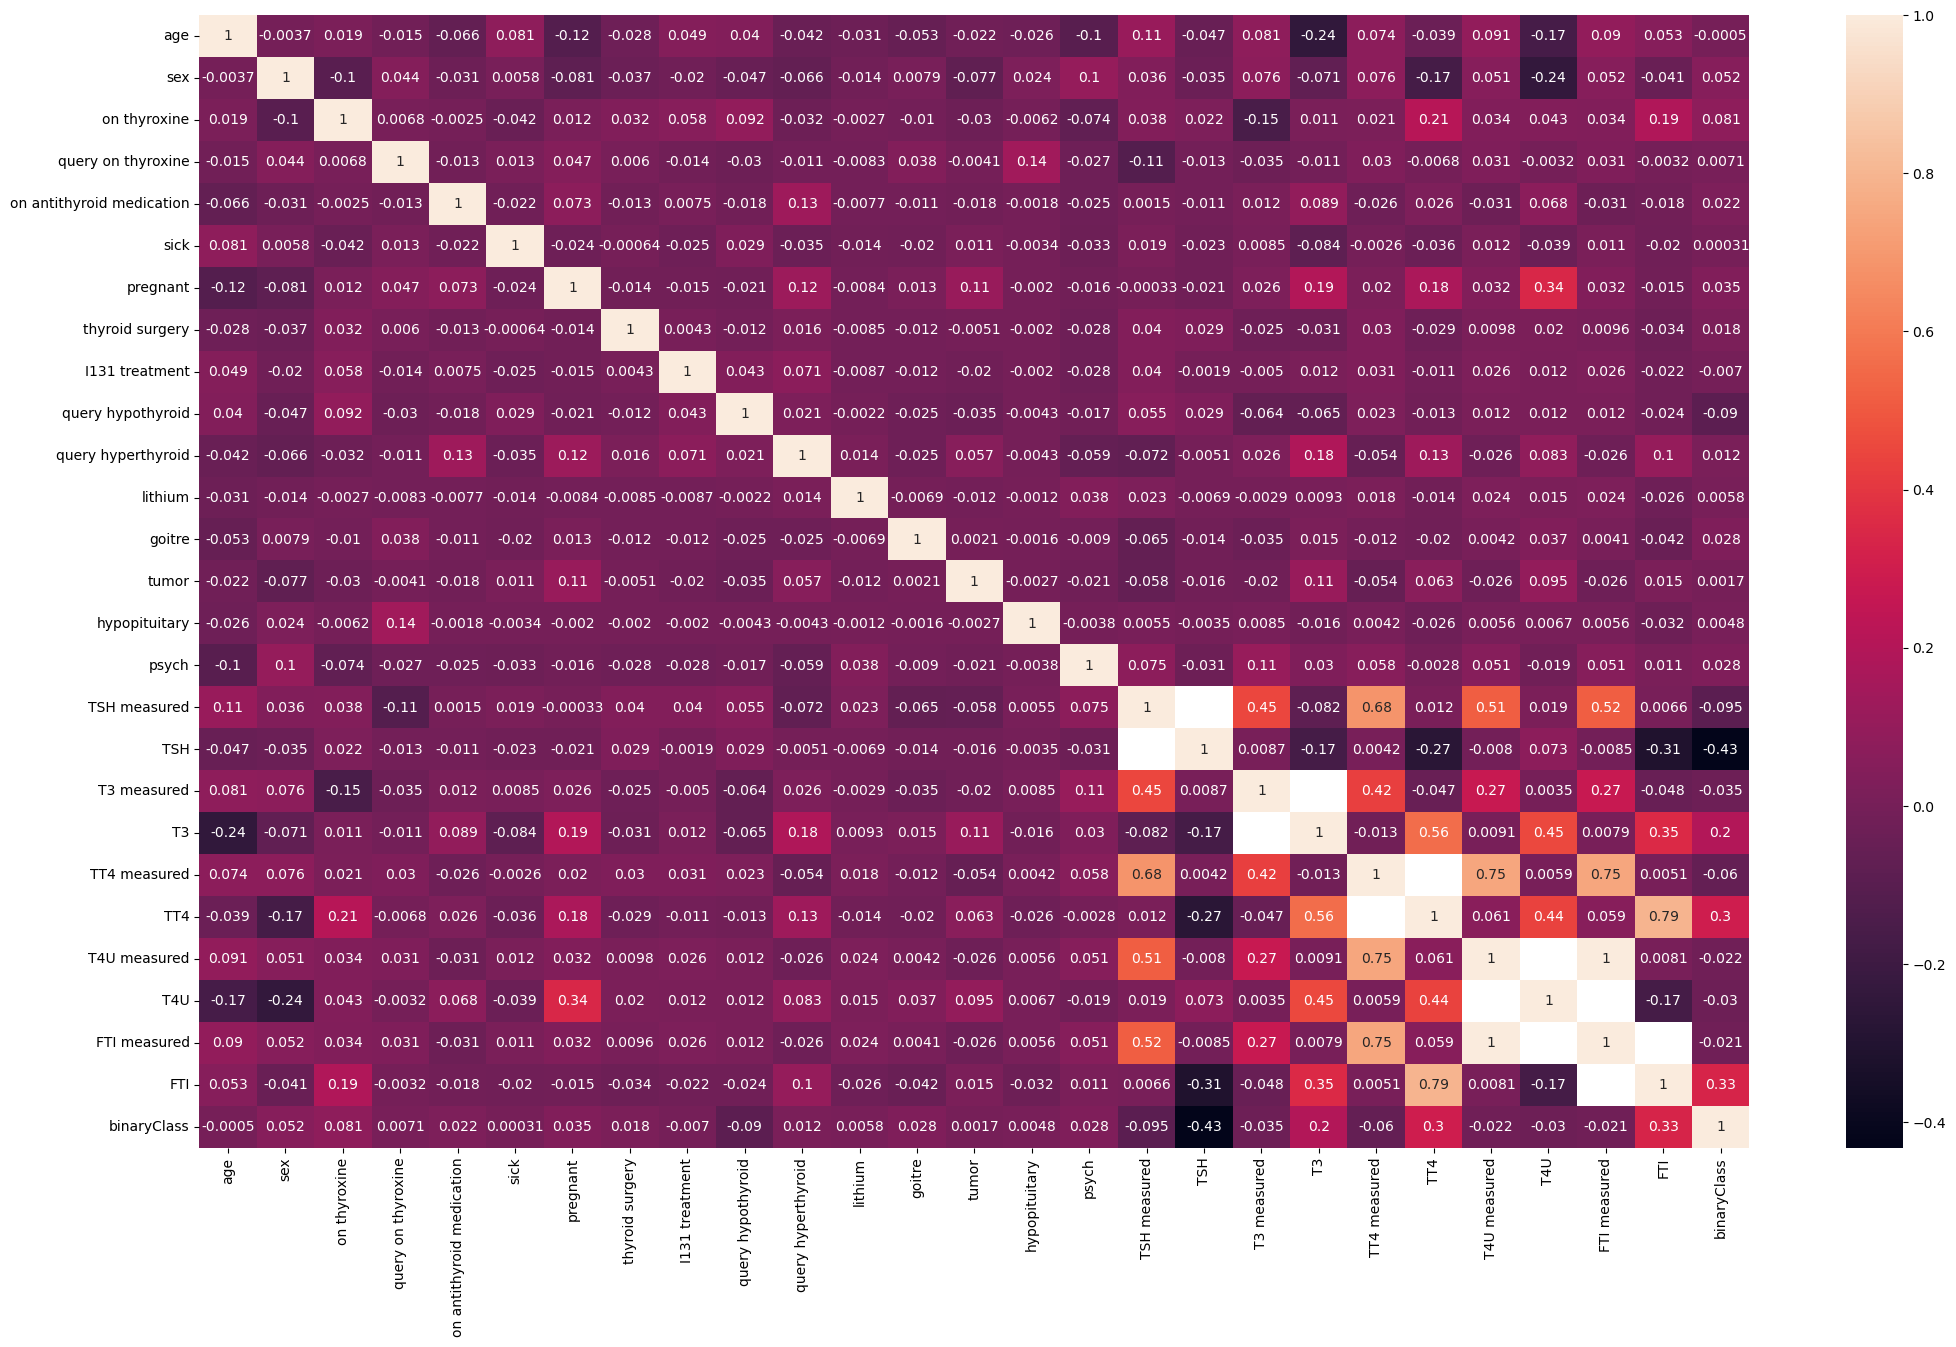

In [20]:
fig,ax = plt.subplots(dpi=100,figsize=(25,15))
sns.heatmap(df.corr(),annot=True,ax=ax)

C:\Users\disha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TSH', ylabel='Density'>

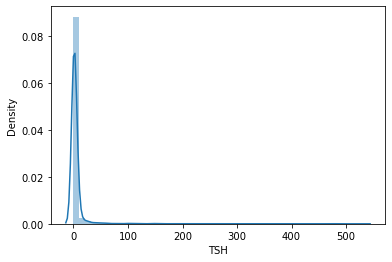

In [21]:
sns.distplot(df.TSH)

C:\Users\disha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='T3', ylabel='Density'>

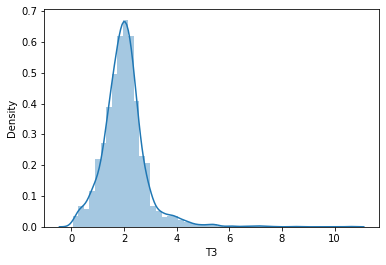

In [22]:
sns.distplot(df['T3'])

C:\Users\disha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TT4', ylabel='Density'>

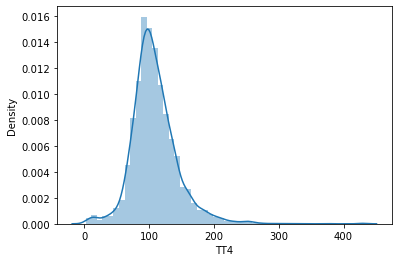

In [23]:
sns.distplot(df['TT4'])

C:\Users\disha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='T4U', ylabel='Density'>

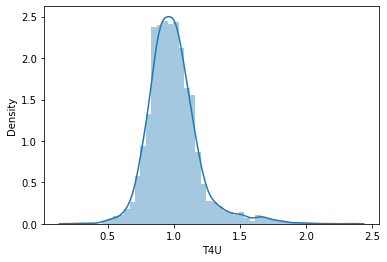

In [24]:
sns.distplot(df['T4U'])

C:\Users\disha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FTI', ylabel='Density'>

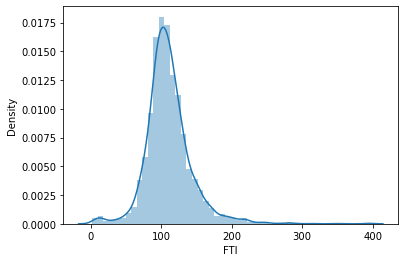

In [25]:
sns.distplot(df['FTI'])

In [26]:
df['TSH'] = df['TSH'].fillna(df['TSH'].median())

C:\Users\disha\AppData\Local\Temp/ipykernel_14680/503917211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TSH'] = df['TSH'].fillna(df['TSH'].median())


In [27]:
df['T3'] = df['T3'].fillna(df['T3'].median())

C:\Users\disha\AppData\Local\Temp/ipykernel_14680/4113207396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['T3'] = df['T3'].fillna(df['T3'].median())


In [28]:
df['TT4'] = df['TT4'].fillna(df['TT4'].median())

C:\Users\disha\AppData\Local\Temp/ipykernel_14680/3861518205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TT4'] = df['TT4'].fillna(df['TT4'].median())


In [29]:
df['T4U'] = df['T4U'].fillna(df['T4U'].median())

C:\Users\disha\AppData\Local\Temp/ipykernel_14680/2325415583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['T4U'] = df['T4U'].fillna(df['T4U'].median())


In [30]:
df['FTI'] = df['FTI'].fillna(df['FTI'].median())

C:\Users\disha\AppData\Local\Temp/ipykernel_14680/1262764443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FTI'] = df['FTI'].fillna(df['FTI'].median())


<AxesSubplot:>

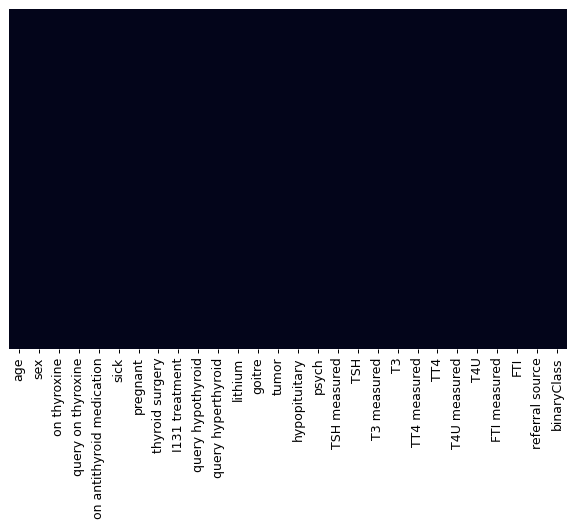

In [31]:
plt.figure(figsize=(8,5),dpi=90)
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

## Feature Selection

In [32]:
df.head(10)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,binaryClass
0,41.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,2.5,1,125.0,1,1.14,1,109.0,SVHC,1
1,23.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,2.0,1,102.0,-1,0.98,-1,107.0,other,1
2,46.0,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,2.0,1,109.0,1,0.91,1,120.0,other,1
3,70.0,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,1.9,1,175.0,-1,0.98,-1,107.0,other,1
4,70.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1.2,1,61.0,1,0.87,1,70.0,SVI,1
5,18.0,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,2.0,1,183.0,1,1.30,1,141.0,other,1
6,59.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,2.0,1,72.0,1,0.92,1,78.0,other,1
7,80.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,0.6,1,80.0,1,0.70,1,115.0,SVI,1
8,66.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,2.2,1,123.0,1,0.93,1,132.0,SVI,1
9,68.0,1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1.6,1,83.0,1,0.89,1,93.0,SVI,1


<AxesSubplot:>

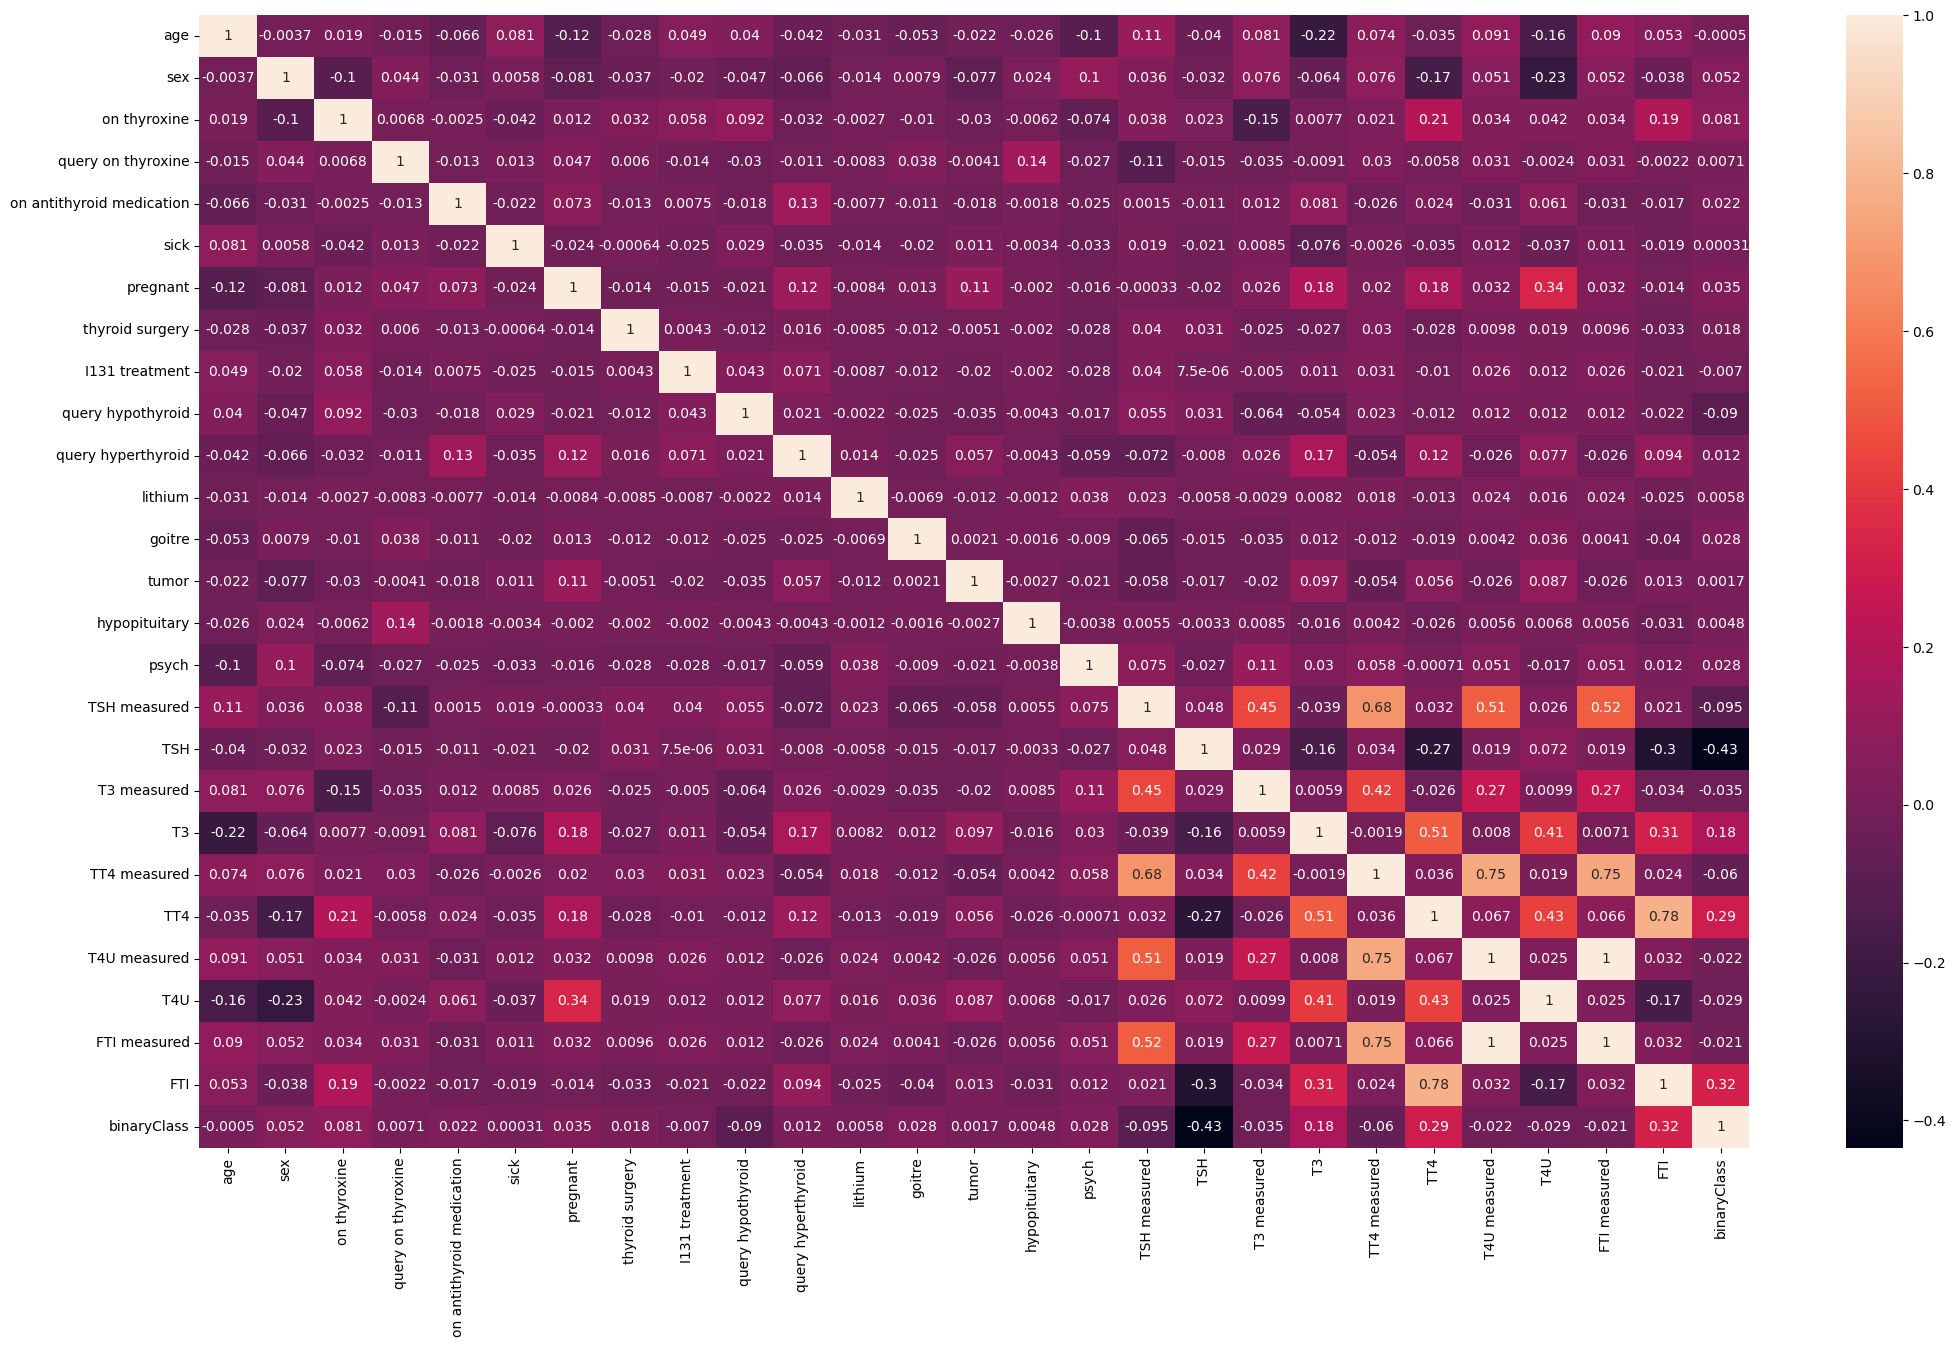

In [33]:
fig,ax = plt.subplots(dpi=100,figsize=(25,15))
sns.heatmap(df.corr(),annot=True,ax=ax)

In [34]:
df = df.drop(['T4U measured'],axis=1)

In [35]:
df['referral source'].value_counts()

other    2110
SVI      1004
SVHC      375
STMW       95
SVHD       37
Name: referral source, dtype: int64

In [36]:
X = df.drop(['binaryClass','referral source'],axis=1)

In [37]:
y = df['binaryClass']

In [38]:
y.value_counts()

 1    3341
-1     280
Name: binaryClass, dtype: int64

## Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
l_reg = LogisticRegression()
l_reg.fit(X_train,y_train)

C:\Users\disha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred = l_reg.predict(X_test)

In [43]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test,y_pred)

0.9613793103448276

In [45]:
precision_score(y_test,y_pred)

0.9605839416058394

In [46]:
recall_score(y_test,y_pred)

0.9984825493171472

## Decision Tree 

In [47]:
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [48]:
cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
print(list(X_test))
max_attributes = len(list(X_test))
depth_range = range(1, max_attributes + 1)

for depth in depth_range:
    fold_accuracy=[]
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)        
    model = tree_model.fit(X_train, y_train) # We fit the model with the fold train data
    valid_acc = model.score(X_test , y_test)# We calculate accuracy with the fold validation data
    fold_accuracy.append(valid_acc)
    
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U', 'FTI measured', 'FTI']
 Max Depth  Average Accuracy
         1          0.986207
         2          0.993103
         3          0.994483
         4          0.998621
         5          0.997241
         6          0.998621
         7          0.998621
         8          0.997241
         9          0.998621
        10          0.998621
        11          0.995862
        12          0.998621
        13          0.998621
        14          0.998621
        15          0.997241
        16          0.998621
        17          0.998621
        18          0.997241
        19          0.997241
        20          0.998621
        21          0.997241
        22          0.99586

In [49]:
d_tree = tree.DecisionTreeClassifier(max_depth = 4)
d_tree.fit(X_train,y_train)
print('Testing Accuracy:', d_tree.score(X_test,y_test))

Testing Accuracy: 0.9986206896551724


## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
r_forest = RandomForestClassifier(n_estimators=1000,random_state=42,max_depth=7)
r_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=1000, random_state=42)

In [52]:
print("Testing Accuracy:", r_forest.score(X_test,y_test))

Testing Accuracy: 0.9958620689655172
